In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random
learning_rate = 0.0001
training_epochs = 1000
display_step = 50

In [35]:
with tf.name_scope("Creation_of_array"):
    x_array=np.asarray([3.0,8.4,3.32,0.88,-2.23,2.11,0.57,-2.25,-3.31,6.45])
    y_array=np.asarray([2.23,0.34,-0.08,2.25,4.41,3.09,-6.66,-9.77,0.001,3.25])
    x = tf.constant(x_array,dtype = tf.float32,name = "x_array")
    y = tf.constant(y_array,dtype = tf.float32, name= "y_array")
with tf.name_scope("Calculating_y_mean"):
    mean_y = tf.reduce_mean(y, name = "mean_y")
    with tf.Session() as sess:
        result_y = sess.run(mean_y)
        print(result_y)

-0.0939001


In [36]:
with tf.name_scope("Calculating_x_mean_and_x_variance"):
    mean_x, variance = tf.nn.moments(x, [0], name = "mean_x_and_variance_x")
    with tf.Session() as sess:
        m, v = sess.run([mean_x, variance])
        print(m)
        print(v)

1.694
13.0031


In [37]:
with tf.name_scope("Calculating_covariance"):
    def tensorflow_covariance(x_array,y_array,x_mean,y_mean):
        cov = 0.0
        for i in range(0,10):
            x_val = tf.subtract(x_array[i],x_mean, name="Finding_difference_of_xval_and_mean")
            y_val = tf.subtract(y_array[i],y_mean, name="Finding_difference_of_yval_and_mean")
            total_val = tf.multiply(x_val,y_val, name="Multiplying_found_values")
            cov = tf.add(cov,total_val, name="Recursive_addition")
        return cov/10.0
    with tf.Session() as sess:
        covar = sess.run(tensorflow_covariance(x,y,m,result_y))
        print(covar)

4.86822


In [38]:
with tf.name_scope("Calculating_slope_m_and_c"):
    slope = tf.div(covar,v,name="Finding_slope")
    intm = tf.multiply(slope,m,name = "Intermediate_step")
    c_intm = tf.subtract(result_y,intm,name = "Finding_c")

    with tf.Session() as sess:
        m_slope = sess.run(slope)
        c = sess.run(c_intm)
        print(m_slope)
        print(c)

0.374388
-0.728113


Epoch: 0050 cost= 8.705457687 W= 0.507264 b= -1.19873
Epoch: 0100 cost= 8.697173119 W= 0.500954 b= -1.19748
Epoch: 0150 cost= 8.690013885 W= 0.495114 b= -1.19619
Epoch: 0200 cost= 8.683809280 W= 0.48971 b= -1.19485
Epoch: 0250 cost= 8.678423882 W= 0.484707 b= -1.19347
Epoch: 0300 cost= 8.673732758 W= 0.480074 b= -1.19207
Epoch: 0350 cost= 8.669634819 W= 0.475784 b= -1.19063
Epoch: 0400 cost= 8.666041374 W= 0.471809 b= -1.18917
Epoch: 0450 cost= 8.662878036 W= 0.468125 b= -1.18767
Epoch: 0500 cost= 8.660084724 W= 0.46471 b= -1.18615
Epoch: 0550 cost= 8.657604218 W= 0.461542 b= -1.18461
Epoch: 0600 cost= 8.655394554 W= 0.458604 b= -1.18306
Epoch: 0650 cost= 8.653413773 W= 0.455877 b= -1.18149
Epoch: 0700 cost= 8.651628494 W= 0.453346 b= -1.1799
Epoch: 0750 cost= 8.650012970 W= 0.450995 b= -1.17831
Epoch: 0800 cost= 8.648540497 W= 0.44881 b= -1.1767
Epoch: 0850 cost= 8.647190094 W= 0.446778 b= -1.17508
Epoch: 0900 cost= 8.645948410 W= 0.444888 b= -1.17346
Epoch: 0950 cost= 8.644796371 W= 

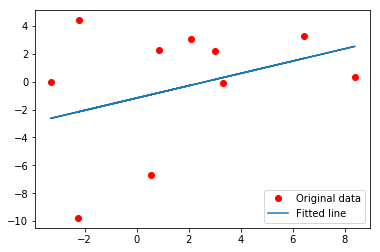

In [39]:

with tf.name_scope("Plotting"):
    n_samples = x_array.shape[0]
    X = tf.placeholder("float")
    Y = tf.placeholder("float")

    # Set model weights
    W = tf.Variable(rng.randn(), name="weight")
    b = tf.Variable(rng.randn(), name="bias")

    # Construct a linear model
    pred = tf.add(tf.multiply(X, W), b)


    # Mean squared error
    cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Launch the graph
    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        for epoch in range(training_epochs):
            for (p, r) in zip(x_array, y_array):
                sess.run(optimizer, feed_dict={X: p, Y: r})

            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c = sess.run(cost, feed_dict={X: x_array, Y:y_array})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                    "W=", sess.run(W), "b=", sess.run(b))

        print("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: x_array, Y: y_array})
        print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

        # Graphic display
        plt.plot(x_array, y_array, 'ro', label='Original data')
        plt.plot(x_array, sess.run(W) * x_array + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()

In [40]:
with tf.name_scope("Finding_root_mean_square_error"):
    rms = tf.sqrt(tf.reduce_mean(tf.squared_difference(x_array, y_array,name = "Finding_squared_difference"),name="Finding_mean"),name = "Finding_square_root")
    with tf.Session() as sess:
        rmse=sess.run(rms)
        print(rmse)

5.04052994238


In [41]:
with tf.name_scope("Finding_theta_1"): 
    y_var = tf.subtract(y,result_y,name = "Subtract_y_array_with_y_mean")
    x_var = tf.subtract(x,m,name = "Subtract_x_array_with_x_mean")
    mult = tf.multiply(x_var,y_var,name = "Multiply_calculated_arrays")
    sumn = tf.reduce_sum(mult,name = "Find_sum_of_x_i_minus_mean_x_and_y_i_minus_mean_y")
    x_var2 = tf.multiply(x_var,x_var,name = "Squaring_found_arrray_values")
    sumd = tf.reduce_sum(x_var2,name = "Find_sum_of_array_of_x_i_minus_mean_x")
    val = sumn/sumd

    with tf.Session() as sess:
        res = sess.run(val)
        print(res)

0.374388


In [42]:
with tf.name_scope("Finding_theta_0"):    
    temp = tf.multiply(res,m,name = "Multiply_res_with_slope")
    theta = tf.subtract(result_y,temp,name="Sub_obtained_res_with_mean_y")
    with tf.Session() as sess:
        theta0 = sess.run(theta)
        print(theta0)

-0.728113


In [43]:
with tf.name_scope("Finding_predictions"):
    mx = tf.multiply(res,x,name = "Multiply_res_with_x_array")
    y_temp = tf.add(mx,theta0,name = "Add_m_multiplied_x_array_with_c")
    with tf.Session() as sess:
        y_new = sess.run(y_temp)
        print(y_new)

[ 0.39505011  2.4167428   0.51485401 -0.39865157 -1.56299686  0.06184506
 -0.51471174 -1.57048464 -1.96733546  1.68668699]


In [44]:
t_minus = tf.subtract(y_new,y,name = "Sub_new_preds_with_original_y")
t_squared = tf.multiply(t_minus,t_minus,name= "Square_obtained_res")
t_sum = tf.reduce_sum(t_squared,name="Find_array_sum")
j_theta = tf.div(t_sum,20,name="Divide_by_no_of_elements")
with tf.Session() as sess:
    print(sess.run(j_theta))

8.56052


In [45]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("/tmp/tboard/output_regg2", sess.graph)
    print(sess.run(j_theta))
    writer.close()

8.56052
